In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw
import os
import random
np.random.seed(0)
random.seed(0)

In [2]:
path2data = "D:\FEL\Ya"
imageL = Image.open(os.path.join(path2data,"imL.png"))
imageN = Image.open(os.path.join(path2data,"imN.png"))
imageN2 = Image.open(os.path.join(path2data,"imN2.png"))

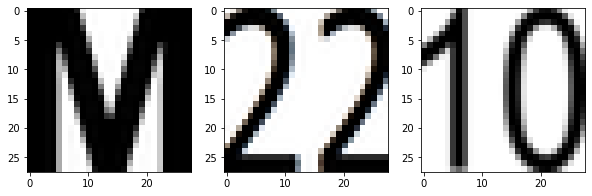

In [3]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(imageL, cmap=plt.cm.gray)
plt.subplot(1,3,2)
plt.imshow(imageN, cmap=plt.cm.gray)
plt.subplot(1,3,3)
plt.imshow(imageN2, cmap=plt.cm.gray)

In [4]:
imageL = np.array(imageL.convert('1'),dtype=np.int).flatten()
imageN = np.array(imageN.convert('1'),dtype=np.int).flatten()
imageN2 = np.array(Image.fromarray(np.array(imageN2,dtype=np.uint)[:,:,1]).convert('1'),dtype=np.int).flatten()

for i in range(0,len(imageL)):
    if(imageL[i]>0):
        imageL[i] = 1
    else:
        imageL[i] = -1

for i in range(0,len(imageN)):
    if(imageN[i]>0):
        imageN[i] = 1
    else:
        imageN[i] = -1
        
for i in range(0,len(imageN2)):
    if(imageN2[i]>0):
        imageN2[i] = -1
    else:
        imageN2[i] = 1 
        
data0 = []
data0.append(np.array(imageL))
data0.append(np.array(imageN))
data0.append(np.array(imageN2))

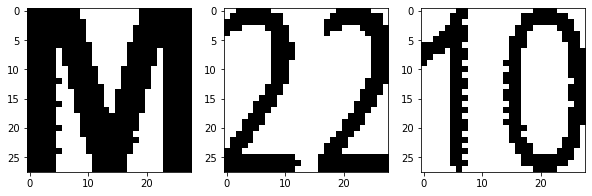

In [5]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(imageL.reshape(28,28), cmap=plt.cm.gray)
plt.subplot(1,3,2)
plt.imshow(imageN.reshape(28,28), cmap=plt.cm.gray)
plt.subplot(1,3,3)
plt.imshow(imageN2.reshape(28,28), cmap=plt.cm.gray)

In [6]:
#print(imageL.reshape(28,28))

In [7]:
import copy
data = []

noise_example_L = copy.deepcopy(imageL)
num_pixels_to_change_L = np.uint8(np.random.rand(1)*np.ceil(len(imageL)/1.5))
pixels_to_change_L = np.uint(np.random.rand(num_pixels_to_change_L[0])*len(imageL))
    
for j in pixels_to_change_L:
    noise_example_L[j] = -noise_example_L[j]
data.append(noise_example_L)

In [8]:
noise_example_N = copy.deepcopy(imageN)
num_pixels_to_change_N = np.uint8(np.random.rand(1)*np.ceil(len(imageN)/2))
pixels_to_change_N = np.uint(np.random.rand(num_pixels_to_change_N[0])*len(imageN))

for j in pixels_to_change_N:
    noise_example_N[j] = -noise_example_N[j]
data.append(noise_example_N)

In [9]:
noise_example_N2 = copy.deepcopy(imageN2)
num_pixels_to_change_N2 = np.uint8(np.random.rand(1)*np.ceil(len(imageN2)/1.5))
pixels_to_change_N2 = np.uint(np.random.rand(num_pixels_to_change_N2[0])*len(imageN2))

for j in pixels_to_change_N2:
    noise_example_N2[j] = -noise_example_N2[j]
data.append(noise_example_N2)

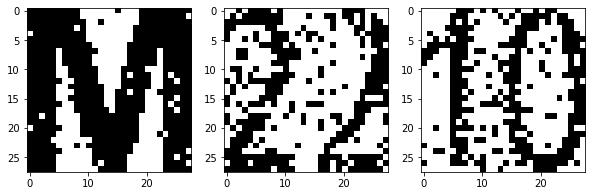

In [10]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(data[0].reshape(28,28), cmap=plt.cm.gray)
plt.subplot(1,3,2)
plt.imshow(data[1].reshape(28,28), cmap=plt.cm.gray)
plt.subplot(1,3,3)
plt.imshow(data[2].reshape(28,28), cmap=plt.cm.gray)

In [11]:
class Hopfield_Net():
    def __init__(self,data_orig,data_noise,num_iter):
        self.data_orig = data_orig
        self.data_noise = data_noise
        self.num_iter = num_iter
        
        summa = np.zeros((self.data_orig.shape[1],self.data_orig.shape[1]))
        for sample in self.data_orig:
            summa = summa + np.dot(sample.reshape((self.data_orig.shape[1],1)),sample.reshape((1,self.data_orig.shape[1])))
        self.W = summa
        self.W = self.W*(np.ones((self.data_orig.shape[1],self.data_orig.shape[1]))-np.eye(self.data_orig.shape[1]))
    
    def forward(self):
        history = []
        result1 = np.sign(np.dot(self.data_noise[0].reshape(1,784),self.W))
        result2 = np.sign(np.dot(self.data_noise[1].reshape(1,784),self.W))
        result3 = np.sign(np.dot(self.data_noise[2].reshape(1,784),self.W))
        
        for i in range(0,self.num_iter):
            result1 = np.sign(np.dot(result1,self.W))
            result2 = np.sign(np.dot(result2,self.W))
            result3 = np.sign(np.dot(result3,self.W))   
            history.append(np.dstack((result1,result2,result3)))
        
        return self.W, history, result1, result2, result3

In [12]:
data0 = np.array(data0)
data = np.array(data)
model = Hopfield_Net(data0,data,1)

In [13]:
m,history,result1, result2,result3 = model.forward()

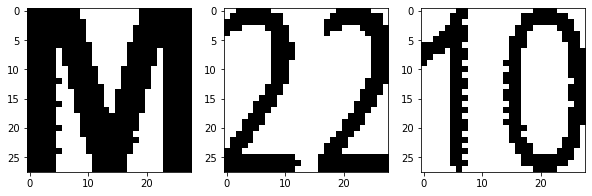

In [14]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(result1.reshape(28,28), cmap=plt.cm.gray)
plt.subplot(1,3,2)
plt.imshow(result2.reshape(28,28), cmap=plt.cm.gray)
plt.subplot(1,3,3)
plt.imshow(result3.reshape(28,28), cmap=plt.cm.gray)

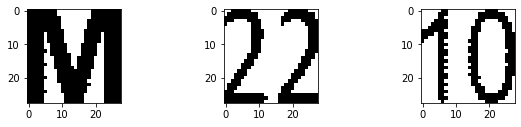

In [15]:
plt.figure(figsize=(10,10))

for i in range(0,np.array(history).shape[0]):
    plt.subplot(5,3,1+3*i)
    plt.imshow(np.array(history)[i,:,:,0].reshape(28,28), cmap=plt.cm.gray)
    plt.subplot(5,3,2+3*i)
    plt.imshow(np.array(history)[i,:,:,1].reshape(28,28), cmap=plt.cm.gray)
    plt.subplot(5,3,3+3*i)
    plt.imshow(np.array(history)[i,:,:,2].reshape(28,28), cmap=plt.cm.gray)